<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/5_3_Equipo_1_Google_Colab_Algoritmos_de_mejoramiento_de_im%C3%A1genes_en_el_dominio_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

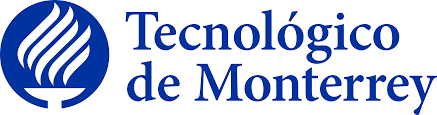

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 5.3 Google Colab algoritmos de mejoramiento de imágenes en el dominio de Fourier



**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

##5.3

El proyecto con el Google Collab modificado y las respuestas a los ejercicios se deben convertir en PDF y también en archivo comprimido y entregarse vía Canvas.
Los ejercicios que deben agregarse a este proyecto serán los siguientes:

 a) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

b) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
%matplotlib inline

from math import sqrt,exp

In [3]:
def gethistogram(im,title):
  hist_full = cv.calcHist([im],[0],None,[256],[0,256])
  plt.plot(hist_full)
  plt.title(title)
  plt.show()

In [6]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

## **Introducción**

La transformada de Fourier se utiliza para analizar las características de frecuencia de varios filtros. Para las imágenes, se utiliza la transformada discreta de Fourier (DFT) 2D para encontrar el dominio de la frecuencia. Los filtros de dominio de frecuencia se utilizan para suavizar y mejorar la nitidez de las imágenes mediante la eliminación de componentes de alta o baja frecuencia.

Los filtros de dominio de frecuencia son diferentes de los filtros de dominio espacial, ya que se centran principalmente en la frecuencia de las imágenes. Se realiza para dos operaciones básicas, es decir, suavizado y afilado.

Los filtros de frecuencia procesan una imagen en el dominio de la frecuencia. La imagen se transforma por Fourier, se multiplica con la función de filtro y luego se vuelve a transformar en el dominio espacial. La atenuación de las frecuencias altas da como resultado una imagen más suave en el dominio espacial, la atenuación de las frecuencias bajas mejora los bordes.

Se utiliza un algoritmo rápido llamado Transformada Rápida de Fourier (FFT) para el cálculo de DFT. Los detalles sobre estos se pueden encontrar en cualquier libro de texto de procesamiento de imágenes o procesamiento de señales.




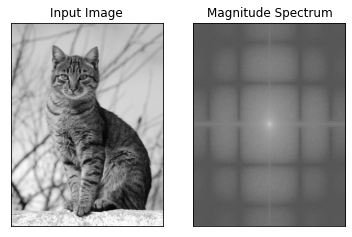

In [5]:
Fou_URL = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Cat_fourier.jpg"
Fou_image = cv.imread(Fou_URL,cv.IMREAD_GRAYSCALE) 
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(Fou_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## 1. Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

El filtro de paso bajo es el tipo de filtro de dominio de frecuencia que se utiliza para suavizar la imagen. Atenúa los componentes de alta frecuencia y preserva los componentes de baja frecuencia.

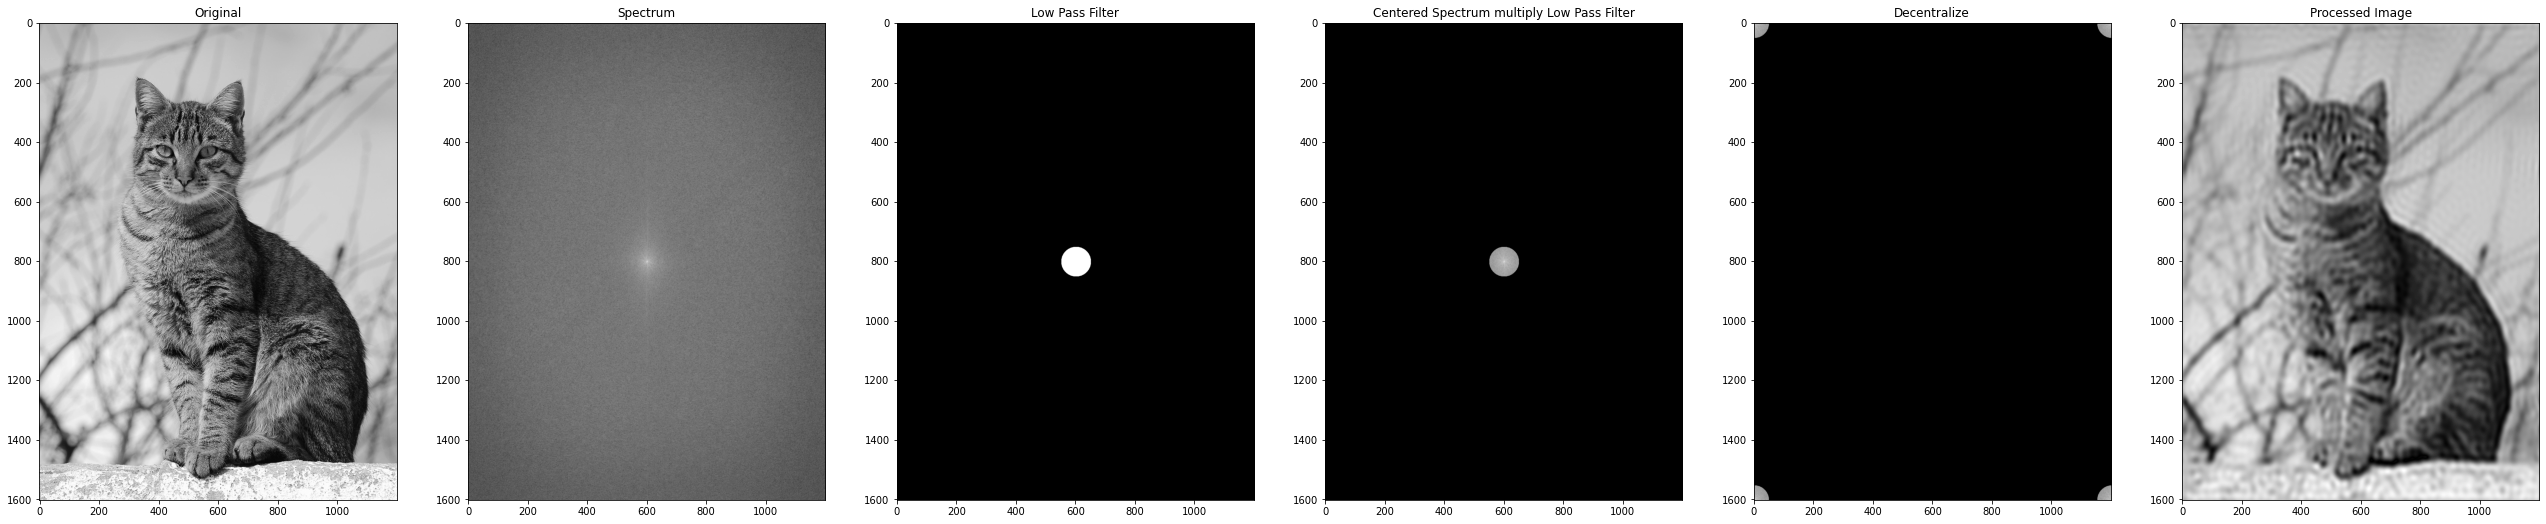

In [15]:
Fou_URL = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Cat_fourier.jpg"
Fou_image = cv.imread(Fou_URL,cv.IMREAD_GRAYSCALE)
original = np.fft.fft2(Fou_image)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*7, 4.8*7), constrained_layout=False)

plt.subplot(161), plt.imshow(Fou_image, cmap = 'gray'), plt.title("Original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,Fou_image.shape)
plt.subplot(163), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,Fou_image.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()


>Aplicación

##2. Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

El filtro de paso alto es el tipo de filtro de dominio de frecuencia que se utiliza para agudizar la imagen. Atenúa los componentes de baja frecuencia y preserva los componentes de alta frecuencia.

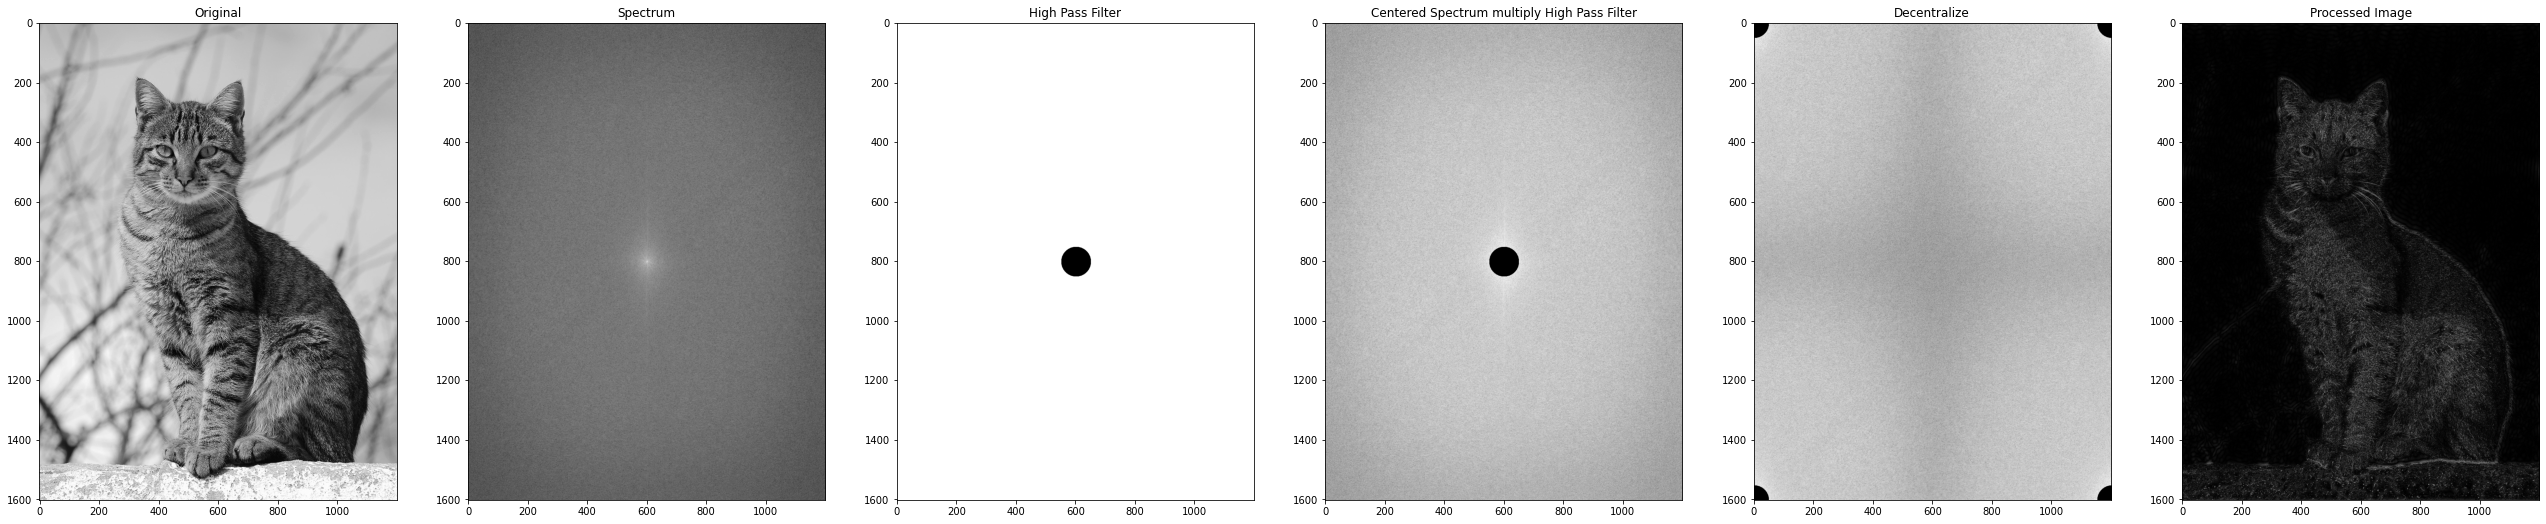

In [16]:
Fou_URL = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Cat_fourier.jpg"
Fou_image = cv.imread(Fou_URL,cv.IMREAD_GRAYSCALE)
original = np.fft.fft2(Fou_image)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*7, 4.8*7), constrained_layout=False)

plt.subplot(161), plt.imshow(Fou_image, cmap = 'gray'), plt.title("Original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,Fou_image.shape)
plt.subplot(163), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,Fou_image.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(166), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

>Aplicación

#Referencias

- Dayal, D. (20 de 10 de 2021). Frequency Domain Filtering on an Image using OpenCV. Obtenido de https://medium.com/@devangdayal/frequency-domain-filtering-on-an-image-using-opencv-26bfcc97e23b

- First Principles of Computer Vision. (2 de marzo de 2021). Image Filtering in Frequency Domain | Image Processing II [Archivo de video]. Youtube.  https://www.youtube.com/watch?v=OOu5KP3Gvx0

- Gonzalez, R. & Woods, R. (2018). Digital Image Processing. 4° Edition. Pearson.

- OpenCV. (2023). Fourier Transform. Obtenido de https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html

- Rosebrock, A. (15 de 06 de 2020). OpenCV Fast Fourier Transform (FFT) for blur detection in images and video streams. Obtenido de https://pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/

- Ruiz, G. O. (2023). Tema 2.3 Mejoramiento de Imágenes usando Fourier. 


